In [6]:
import random

import numpy as np
import matplotlib.pyplot as plt

%load_ext line_profiler

In [77]:
population = 4
mutations = 0.005

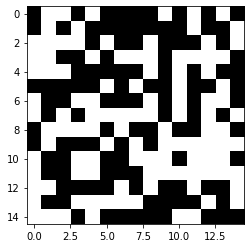

In [66]:
img = np.random.randint(2, size=(15,15))
plt.imshow(img, cmap=plt.cm.gray)  # use appropriate colormap here
plt.show()

In [125]:
def ga(img, population, mutations):

    def score(matrix1, matrix2):
        return (matrix1 == matrix2).sum()

    rows = img.shape[0]
    columns = img.shape[1]
    mid = rows//2

    mem = np.random.randint(2, size=(2 * population, rows, columns))
    scores = np.zeros((2 * population))

    for i in range(10000):

        for k, matrix in enumerate(mem):
            scores[k] = score(matrix, img)

        max_score = np.argmax(scores)

        if scores[max_score] == rows * columns:
            print(i)
            plt.imshow(mem[max_score], cmap=plt.cm.gray)  # use appropriate colormap here
            plt.show()
            break

        top_n_scores = np.argpartition(scores, population)
        top = top_n_scores[population:]
        bottom = top_n_scores[:population]


        for j in range(population):
            
            # I tried this with random choice and just picking a random position
            # from the top and the next one and the result is the same but way faster
            # It might be because of either the randomization of the initial population or maybe
            # the implementation of argpartition? or both?
            r = random.randrange(len(top))  
            idx = [r, (r+1)%len(top)]
            parents = [top[idx[0]],top[idx[1]]]
            
            mem[bottom[j]][0:mid] = mem[parents[0]][0:mid]
            mem[bottom[j]][-(mid+1):] = mem[parents[1]][-(mid+1):]

            # The random choice of the bits to mutate is the most costly of the implementation
            # It seems there has to be some way to speed up this 
            idx = np.random.choice([0,1], p=[(1-mutations), mutations],size=(rows,columns))
            mem[bottom[j]] = abs(mem[bottom[j]] - idx)


140


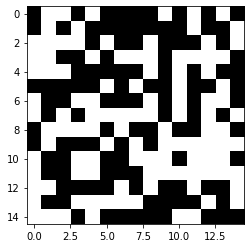

Timer unit: 1e-09 s

Total time: 2.86443 s
File: /tmp/ipykernel_32068/3493299968.py
Function: ga at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def ga(img, population, mutations):
     2                                           
     3         1       1292.0   1292.0      0.0      def score(matrix1, matrix2):
     4                                                   return (matrix1 == matrix2).sum()
     5                                           
     6         1       3176.0   3176.0      0.0      rows = img.shape[0]
     7         1        461.0    461.0      0.0      columns = img.shape[1]
     8         1        451.0    451.0      0.0      mid = rows//2
     9                                           
    10         1    1678025.0 1678025.0      0.1      mem = np.random.randint(2, size=(2 * population, rows, columns))
    11         1       6132.0   6132.0      0.0      scores = np.zeros((2 * population

In [126]:
%lprun -f ga ga(img, population, mutation)